In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap

In [4]:
df = pd.read_csv("US_Accidents_Dec20_Updated.csv")
print("Data shape:", df.shape)
print("Missing values:\n", df.isnull().sum())


Data shape: (42768, 47)
Missing values:
 ID                           0
Severity                     0
Start_Time                   0
End_Time                     0
Start_Lat                    0
Start_Lng                    1
End_Lat                   4206
End_Lng                   4206
Distance(mi)                 1
Description                  1
Number                   27880
Street                       1
Side                         1
City                         5
County                       1
State                        1
Zipcode                     14
Country                      1
Timezone                    46
Airport_Code                93
Weather_Timestamp          682
Temperature(F)             983
Wind_Chill(F)            17597
Humidity(%)               1040
Pressure(in)               840
Visibility(mi)            1050
Wind_Direction             925
Wind_Speed(mph)           4518
Precipitation(in)        19204
Weather_Condition         1057
Amenity                      

C:\Users\abinb\AppData\Local\Temp\ipykernel_2300\3054768323.py:1: DtypeWarning: Columns (30,31,32,33,34,35,36,37,38,39,40,41,42) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("US_Accidents_Dec20_Updated.csv")


C:\Users\abinb\AppData\Local\Temp\ipykernel_2300\776882096.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Severity', palette='viridis')


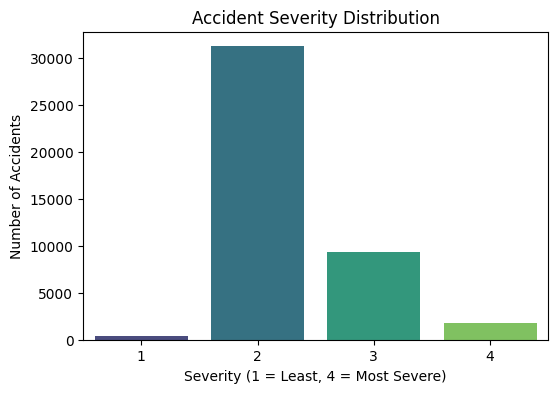

In [5]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Severity', palette='viridis')
plt.title("Accident Severity Distribution")
plt.xlabel("Severity (1 = Least, 4 = Most Severe)")
plt.ylabel("Number of Accidents")
plt.show()

C:\Users\abinb\AppData\Local\Temp\ipykernel_2300\867088225.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_weather.values, y=top_weather.index, palette='Blues_r')


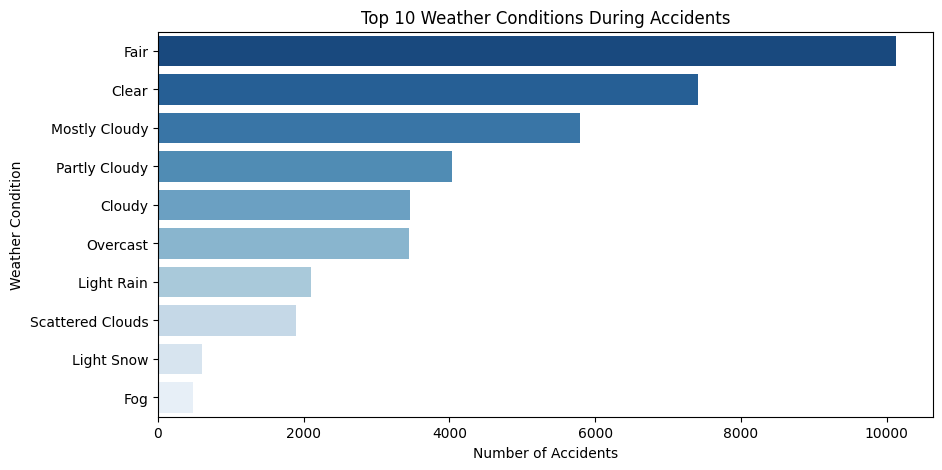

In [6]:
top_weather = df['Weather_Condition'].value_counts().nlargest(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_weather.values, y=top_weather.index, palette='Blues_r')
plt.title("Top 10 Weather Conditions During Accidents")
plt.xlabel("Number of Accidents")
plt.ylabel("Weather Condition")
plt.show()

C:\Users\abinb\AppData\Local\Temp\ipykernel_2300\1142671265.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=road_impact.values, y=road_impact.index, palette='magma')


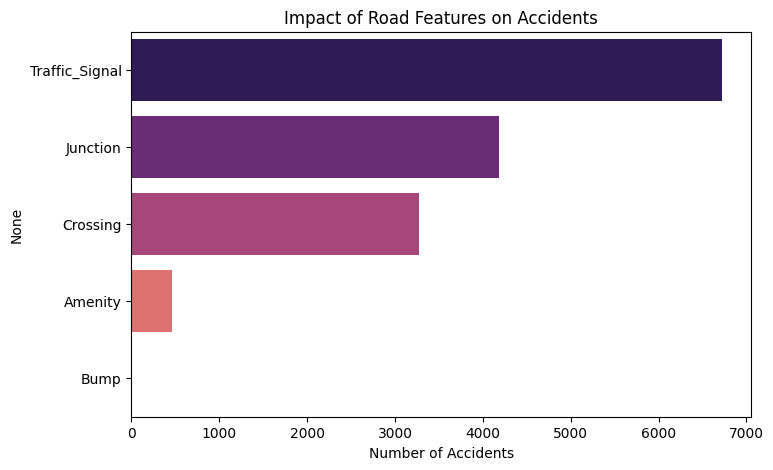

In [8]:
features = ['Amenity', 'Bump', 'Crossing', 'Junction', 'Traffic_Signal']
road_impact = df[features].sum().sort_values(ascending=False)
plt.figure(figsize=(8,5))
sns.barplot(x=road_impact.values, y=road_impact.index, palette='magma')
plt.title("Impact of Road Features on Accidents")
plt.xlabel("Number of Accidents")
plt.show()

In [13]:
sample_df = df[['Start_Lat', 'Start_Lng']].dropna().sample(n=10000, random_state=1)
m = folium.Map(location=[39.8283, -98.5795], zoom_start=5)
HeatMap(sample_df.values, radius=8, max_zoom=13).add_to(m)



In [14]:
m.save("accident_hotspots_map.html")
print("Heatmap saved as accident_hotspots_map.html")

Heatmap saved as accident_hotspots_map.html
